# Classification Based Machine Learning Algorithm

## Importing the MNIST dataset

His method of importing using sklearn did not work with firewall settings where I currently am. Found file online and imported it locally.

In [29]:
from scipy.io import loadmat
mnist_path = os.getcwd() + '/Data/mldata/MNIST_original'
mnist_raw = loadmat(mnist_path)

MemoryError: 

In [34]:
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
del(mnist_raw)

In [33]:
len(mnist['data'])
mnist['data'].shape

(70000, 784)

## Visualization

In [36]:
X, y = mnist['data'], mnist['target']

In [37]:
X.shape, y.shape

((70000, 784), (70000,))

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

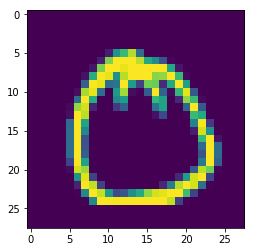

In [42]:
_ = X[1000]
_image = _.reshape(28,28)
plt.imshow(_image)

In [43]:
y[1000]

0.0

### Exercise: Locate the number 4 and plot the image

In [45]:
type(y)

numpy.ndarray

In [46]:
y == 4

array([False, False, False, ..., False, False, False])

In [49]:
np.where(y == 4)

(array([24754, 24755, 24756, ..., 65136, 65137, 65138], dtype=int32),)

In [50]:
y[24754]

4.0

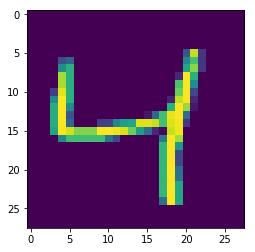

In [51]:
_ = X[24754]
_image = _.reshape(28,28)
plt.imshow(_image)

## Splitting the train and test sets

In [52]:
num_split = 60000

X_train, X_test, y_train, y_test = X[:num_split], X[num_split], y[:num_split], y[num_split:]

Tip: Typically we shuffle the training set. This ensures the training set is randomized and your data is consistent.

## Shuffling the dataset

In [53]:
import numpy as np

In [54]:
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier

To simplify our problem, we will make this an exercise of "zero" or "non-zero", making it a two class problem

We need to first convert our target to 0 or non zero.

In [55]:
y_train_0 = (y_train == 0)

In [56]:
y_train_0

array([False, False, False, ..., False, False, False])

In [57]:
y_test_0 = (y_test == 0)

In [58]:
y_test_0

array([ True,  True,  True, ..., False, False, False])

At this point we can pick and classifier and train it. This is the iterative part of choosing and testing all the classifiers and tuning the hyperparameters.

***

## SGDClassifier

### Training

In [60]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state=0)

In [ ]:
clf.fit(X_train, y_train)